In [19]:
# Основные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Все методы кластеризации из sklearn
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Для визуализации дендрограмм (иерархическая кластеризация)
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

In [4]:
df = pd.read_csv('data/CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.isnull().sum().sum()

np.int64(314)

In [6]:
df.fillna(df.mean(numeric_only=True), inplace = True)
df['MINIMUM_PAYMENTS'].mean(numeric_only=True)

np.float64(864.2065423050827)

In [7]:
df.drop('CUST_ID', axis = 1, inplace = True)
X = df.values
scaler = StandardScaler()
scaler.fit(X)
X_norm = scaler.transform(X)
X_norm[0][0]

np.float64(-0.7319893664465486)

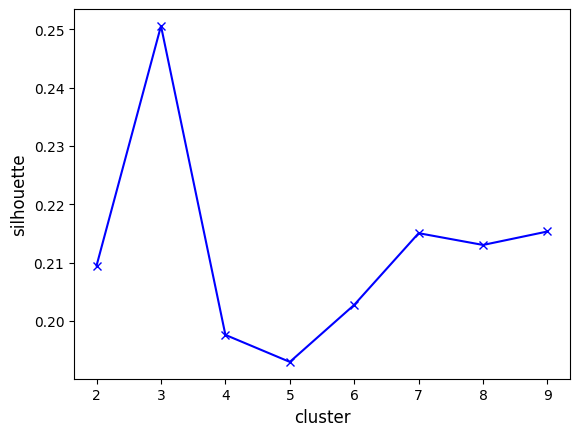

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def get_silhouette(cluster_num, df):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42, init='random')
    k_means.fit(df)
    silhouette = silhouette_score(df, k_means.labels_, metric='euclidean')
    return silhouette
from sklearn.metrics import silhouette_score
silhouettes = []
for i in range(2, 10):
    silhouettes.append(get_silhouette(i ,X_norm))
    
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouettes, 'xb-');

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42, init='random')
kmeans.fit(X_norm)
df.loc[:, 'label'] = kmeans.labels_
df.label.value_counts().min()

np.int64(1235)

In [13]:
db = DBSCAN()
db.fit(X_norm)
clusters = db.labels_
len(set(clusters)) - (1 if -1 in clusters else 0)

38

In [14]:
siliuette_list_dbscan = []
 
for eps in np.arange(0.1,3,0.2):
    for min_sample in range(1,20,4):
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        dbscan.fit(X_norm)
        sil_score = silhouette_score(X_norm, dbscan.labels_, metric='euclidean')
        siliuette_list_dbscan.append((eps, min_sample, sil_score, len(set(dbscan.labels_))) )
df_dbscan = pd.DataFrame(siliuette_list_dbscan, columns=['eps', 'min_samples', 'sil_score', 'number_of_clusters'])
df_dbscan.sort_values(by = 'sil_score')

,eps,min_samples,sil_score,number_of_clusters
11,0.5,5,-0.443701,39
16,0.7,5,-0.438837,29
6,0.3,5,-0.424475,42
7,0.3,9,-0.404209,15
30,1.3,1,-0.399305,1536
...,...,...,...,...
74,2.9,17,0.591924,2
66,2.7,5,0.592182,2
73,2.9,13,0.595399,2
72,2.9,9,0.603811,2


In [21]:
siliuette_list_hierarchical = []
 
for cluster in range(3,10,1):
    # ИСПРАВЛЕНО: используйте 'metric' вместо 'affinity'
    agglomerative = AgglomerativeClustering(metric='euclidean', n_clusters=cluster).fit_predict(X_norm)
    sil_score = silhouette_score(X_norm, agglomerative, metric='euclidean')
    siliuette_list_hierarchical.append((cluster, sil_score, len(set(agglomerative))))
        
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns=['cluster', 'sil_score', 'number_of_clusters'])
 
df_hierarchical.sort_values(by='sil_score', ascending=False)

,cluster,sil_score,number_of_clusters
3,6,0.173356,6
0,3,0.173110,3
2,5,0.158069,5
4,7,0.156415,7
1,4,0.154709,4
6,9,0.153719,9
5,8,0.152035,8


In [23]:
model = AgglomerativeClustering(n_clusters=6).fit(X_norm)
df['cluster_id'] = model.labels_
print(df['cluster_id'].value_counts())

cluster_id
0    3946
1    2931
2     864
5     722
3     464
4      23
Name: count, dtype: int64
